In [ ]:
import os
import tensorflow.keras
import numpy as np
import cv2
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
from keras.layers.pooling.global_average_pooling1d import GlobalAveragePooling1D
from keras.layers import Dense, Flatten

from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# add bad_nails
!cp "/content/gdrive/MyDrive/Moles/Nails/set/bad_nails/bad_nails_20-12_1639_from_Nick.zip" bad_nails_20-12_1639_from_Nick.zip
!unzip "/content/bad_nails_20-12_1639_from_Nick.zip" -d /content/bad_nails

# add good_nails
!cp "/content/gdrive/MyDrive/Moles/Nails/set/good/good_nails.zip" good_nails.zip
!unzip "/content/good_nails" -d /content/good_nails

In [ ]:
def cycle(file_pass, array_name, array_label):
  for root, dirs, files in os.walk(file_pass): 
    for i, j in enumerate(files):
      try:
        if ".png" in j:
          array_name.append(cv2.resize(cv2.imread(f"{file_pass}/{j}"), (224, 224)))

          # adding a photo label depending on the folder
        
          if root == "/content/bad_nails":
            label_array.append(1)
          else:
            label_array.append(0)
      except:
        continue



# array of imreadImg
all_moles_array = []
label_array = []

cycle("/content/bad_nails", all_moles_array, label_array)
cycle("/content/good_nails", all_moles_array, label_array)


X_train, X_test, y_train, y_test = train_test_split(all_moles_array, label_array, test_size=0.2, random_state=4)


le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3055, 224, 224, 3)
(764, 224, 224, 3)
(3055, 2)
(764, 2)


In [ ]:
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
from keras.layers.pooling.global_average_pooling1d import GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.applications import ResNet152
from keras.models import Model

def c_model():
  img_rows, img_cols = 224, 224

  resnet = ResNet152(weights = 'imagenet', include_top = False, input_shape = (img_rows, img_cols, 3))


  for layer in resnet.layers:
    layer.trainable = False

  top_model = resnet.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024, activation = 'relu')(top_model)
  top_model = Dense(1024, activation = 'relu')(top_model)
  top_model = Dense(512, activation = 'relu')(top_model)
  top_model = Dense(2, activation='sigmoid')(top_model)

  FC_Head = top_model
  model = Model(inputs = resnet.input, outputs = FC_Head)

  opt = Adam(0.001)

  model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model


  model = c_model()

In [ ]:
# Add your filepath
filepath="/content/gdrive/MyDrive/Moles/Nails/ResNet152/with_lr(0.001)/with_BS_64_28+_ResNet152_3750val_{epoch:02d}_acc-{accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

In [ ]:
model = c_model()

234698864/234698864 [==============================] - 4s 0us/step


In [ ]:
model.save("/content/gdrive/MyDrive/Moles/Nails/model_nails.h5", save_format= "h5")

In [ ]:
model.load_weights("/content/gdrive/MyDrive/Moles/Nails/ResNet152/with_lr(0.001)/with_BS_64_22+_ResNet152_3750val_05_acc-1.00_valAcc-0.99.h5")

In [ ]:
# To pray that it starts without errors...
history = model.fit(x=X_train, y=y_train,
                    epochs=5,
                    callbacks=callbacks_list, 
                    steps_per_epoch=len(X_train)//64,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    validation_split=0.1,
                    verbose=1,
                    initial_epoch=0, validation_steps=len(X_test))

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])

plt.show()

In [ ]:
# # model.load_weights("/content/gdrive/MyDrive/Moles/Nails/finding_beast_parm/activation/24+softmax_VGG16_3700val_03_acc0.99_valAcc0.99.h5")
model.load_weights("/content/gdrive/MyDrive/Moles/Nails/ResNet152/with_lr(0.001)/with_BS_64_28+_ResNet152_3750val_05_acc-1.00.h5")

In [ ]:
!cp "/content/gdrive/MyDrive/Moles/classification/test-moles/training_images_big_full.zip" training_images_big_full.zip
!unzip "/content/training_images_big_full.zip" -d /content/test-moles

In [ ]:
!cp "/content/gdrive/MyDrive/Moles/Nails/set/result_to_test/result_nails_res_last.zip" result_nails_res_last.zip
!unzip "/content/result_nails_res_last.zip" -d /content/test-moles

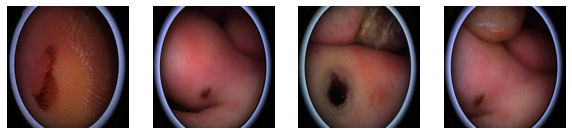

62


In [ ]:
def cycle_using_model(file_pass, array_name, names_array_name):
  for root, dirs, files in os.walk(file_pass): 
    for i, j in enumerate(files):
      if ".png" in j:
        array_name.append(cv2.cvtColor(cv2.resize(cv2.imread(f"{file_pass}/{j}"), (224, 224)),cv2.COLOR_BGR2RGB))
        names_array_name.append((i,j))


test_array = []
names_array = []

cycle_using_model("/content/test-moles", test_array, names_array)

# just for visualization
plt.figure(figsize=(10,10))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(test_array[i])
  plt.axis('off')
plt.show()

test_array = np.array(test_array)
print(len(test_array))

In [ ]:
# Array of bad moles
# arr_0 = []
# arr_1 = []


outliers_array = []

for i in range(len(test_array)):
  img = np.expand_dims(test_array[i], axis=0)
  output = model.predict(img)
  print(i)
  # print(output)

  if  output[0][1] > output[0][0]+0.8:

    # arr_0.append(output[0][0])
    # arr_1.append(output[0][1])

    outliers_array.append(names_array[i][1])

In [ ]:
!mkdir "result3"

print(f"outliers_array: {len(outliers_array)}")

def move_to_dir(source, destination):
  for f in outliers_array:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    os.rename(src_path, dst_path)

# source0 = "/content/result"
# destination0 = "/content/trash"

source2 = "/content/test-moles"
destination2 = "/content/result3"

# move_to_dir(source0, destination0)
move_to_dir(source2, destination2)

!zip -r result_nails_res3.zip "/content/result3"

In [ ]:
!cp result_nails_res.zip "/content/gdrive/MyDrive/Moles/Nails/ResNet152/with_lr(0.001)_bs64"